In [1]:
#to avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(r"data\salary_synteticdata.csv")

In [4]:
data.head()

,Age,Salary
0,52,94500
1,45,82250
2,33,61250
3,47,85750
4,37,68250


In [5]:
data.shape

(1000, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x2c2076ed788>,
 'caps': [<matplotlib.lines.Line2D at 0x2c2076edf48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c2076e3b48>],
 'medians': [<matplotlib.lines.Line2D at 0x2c2076fc988>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c2076fca88>],
 'means': []}

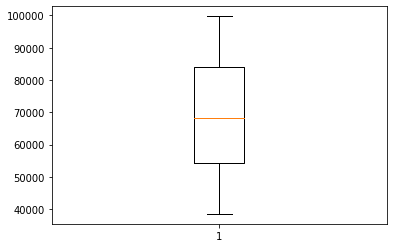

In [6]:
plt.boxplot(data['Salary']) #there are no outliers since the data is synthetic

{'whiskers': [<matplotlib.lines.Line2D at 0x2c20779df88>,
 'caps': [<matplotlib.lines.Line2D at 0x2c2077a0b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c20779d808>],
 'medians': [<matplotlib.lines.Line2D at 0x2c2077a4ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c2077ab948>],
 'means': []}

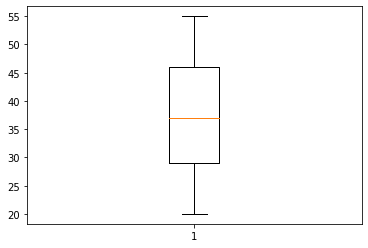

In [7]:
plt.boxplot(data['Age']) ##there are no outliers since the data is synthetic

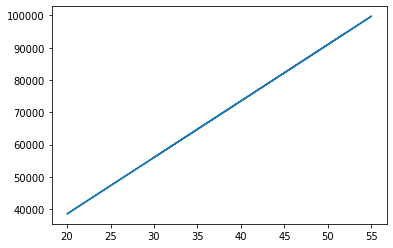

In [8]:
plt.plot(data['Age'],data['Salary']) #data has a good liner relationship

In [9]:
data.corr() #data has a correlation of 1

,Age,Salary
Age,1.0,1.0
Salary,1.0,1.0


### since there is no missing values and impurities no preprocessing is required.


### split the data into X and y
- X is the set of input variables (Age)
- y is the target variable (Salary)

In [10]:
X=data['Age']
y=data['Salary']

In [11]:
X=X.values.reshape(-1, 1) #X should be an array or dataframe

In [12]:
X.shape

(1000, 1)

In [13]:
y.head()

0    94500
1    82250
2    61250
3    85750
4    68250
Name: Salary, dtype: int64

# split the data into train and test sets
- Train data is used for training the model
- Test data is used to test/evaluate the model

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #0.75 data will be for training.

In [15]:
X_train.shape


(750, 1)

In [16]:
X_test.shape

(250, 1)

### Use Linear Regression for modelling

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #creating object of LinearRegression
reg.fit(X_train,y_train) #training and fitting LR object using training data

#fit command is used for training a model using train data.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#coeeficients of liner regression - m
reg.coef_

array([1750.])

In [19]:
#intercept of liner regression - c
reg.intercept_

3500.0

In [20]:
ypred=reg.predict(X_test)  #predicting the salary for testing data


#in this context actual value will be y_test and predicted value will be ypred..
#error is calculated in such a way that vraiation of ypred from y_test

In [21]:
ypred

array([75250., 70000., 64750., 68250., 47250., 38500., 82250., 75250.,
       75250., 68250., 80500., 91000., 85750., 92750., 98000., 73500.,
       59500., 54250., 85750., 42000., 84000., 82250., 57750., 45500.,
       64750., 64750., 70000., 91000., 87500., 82250., 91000., 45500.,
       87500., 38500., 91000., 75250., 64750., 71750., 99750., 49000.,
       40250., 52500., 57750., 75250., 82250., 73500., 49000., 64750.,
       85750., 59500., 75250., 40250., 98000., 54250., 96250., 56000.,
       84000., 50750., 99750., 66500., 77000., 63000., 68250., 70000.,
       52500., 57750., 77000., 78750., 38500., 38500., 38500., 59500.,
       42000., 84000., 49000., 82250., 43750., 38500., 63000., 50750.,
       89250., 64750., 73500., 89250., 75250., 54250., 98000., 71750.,
       63000., 66500., 73500., 59500., 68250., 49000., 84000., 64750.,
       50750., 49000., 99750., 47250., 43750., 78750., 43750., 59500.,
       45500., 63000., 73500., 73500., 50750., 61250., 99750., 56000.,
      

In [22]:
from sklearn.metrics import mean_squared_error #calculating MSE
MSE=mean_squared_error(ypred,y_test)
print("MSE:",MSE)

MSE: 0.0


In [23]:
sum((y_test-ypred)**2)/len(ypred) #this is how we can calculate MSE.

0.0

In [24]:
Results= pd.DataFrame(columns=['Actual','Predicted','Age'])
Results['Actual']=y_test
Results['Predicted']=ypred
Results['Age']=X_test
Results=Results.reset_index()
Results['Id']=Results.index
Results.head()

,index,Actual,Predicted,Age,Id
0,910,75250,75250.0,41,0
1,368,70000,70000.0,38,1
2,713,64750,64750.0,35,2
3,123,68250,68250.0,37,3
4,43,47250,47250.0,25,4


[]

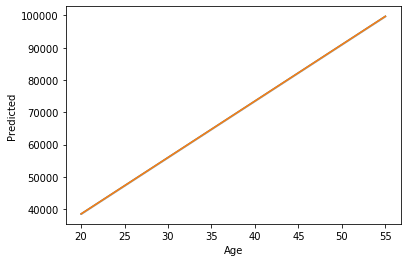

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Age',y='Actual',data=Results)
sns.lineplot(x='Age',y='Predicted',data=Results)
plt.plot()